<a href="https://colab.research.google.com/github/zainabkhosravi/CS-SBU-DataMining-Msc-projects/blob/zainabkhosravi-99422067/ZainabKhosravi-99422067/project1/problem_solving1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/gdrive/MyDrive/AB_NYC_2019.CSV')

In [ ]:
print("The field name of data: ", data.columns)
print("Number of fields in data: ", len(data.columns))
print("Number of data in data: ", len(data))

The field name of data:  Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
Number of fields in data:  16
Number of data in data:  48895


In [ ]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
data.fillna({'reviews_per_month':0}, inplace=True)
data.fillna({'name':"NoName"}, inplace=True)
data.fillna({'host_name':"NoName"}, inplace=True)
data.fillna({'last_review':"NotReviewed"}, inplace=True)

In [ ]:
visual_data = data.copy()

In [ ]:
print("5%: ",visual_data.quantile(0.05)['price'])
print("25%: ", visual_data.quantile(0.25)['price'])
print("50%: ", visual_data.quantile(0.5)['price'])
print("75%: ", visual_data.quantile(0.75)['price'])
print("95%: ", visual_data.quantile(0.95)['price'])

5%:  40.0
25%:  69.0
50%:  106.0
75%:  175.0
95%:  355.0


In [ ]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
data["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

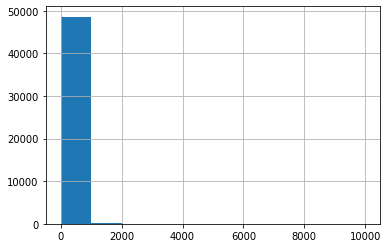

In [ ]:
hist_price=data["price"].hist()

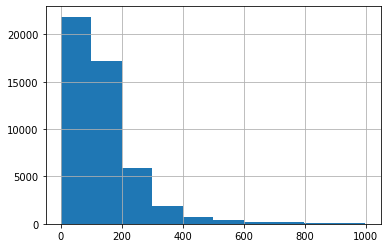

In [ ]:
hist_price1=data["price"][data["price"]<1000].hist()

In [ ]:
data[data["price"]>1000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,NaN,NaN,1,365
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,NaN,NaN,1,0
1480,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,2016-01-28,0.71,11,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48080,36074198,Luxury apartment 2 min to times square,203565865,Vinícius,Manhattan,SoHo,40.72060,-74.00023,Entire home/apt,1308,2,0,NaN,NaN,1,179
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,NaN,NaN,1,222
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,NaN,NaN,1,270
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,NaN,NaN,1,349


In [ ]:
data=data[data["price"]<1000]

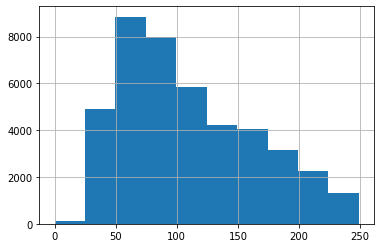

In [ ]:
hist_price2=data["price"][data["price"]<250].hist()

In [ ]:
data=data[data["price"]<250]

In [ ]:
data["price"].describe()

count    42669.000000
mean       107.897748
std         53.803457
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        249.000000
Name: price, dtype: float64

In [ ]:
data['neighbourhood'].value_counts()

Bedford-Stuyvesant    3560
Williamsburg          3451
Harlem                2487
Bushwick              2404
Upper West Side       1570
                      ... 
New Dorp                 1
Willowbrook              1
Neponsit                 1
Rossville                1
Richmondtown             1
Name: neighbourhood, Length: 219, dtype: int64

In [ ]:
len(data["neighbourhood"])

42669

In [ ]:
data =data.groupby("neighbourhood").filter(lambda x: x['neighbourhood'].count() == 1)
len(data["neighbourhood"])

5

In [ ]:
data['neighbourhood_group'].value_counts()

Staten Island    4
Queens           1
Name: neighbourhood_group, dtype: int64

In [ ]:
ng_price=data.groupby("neighbourhood_group")["price"].mean()

In [ ]:
ng_price

neighbourhood_group
Queens           200.00
Staten Island    114.75
Name: price, dtype: float64

In [ ]:
df = data.groupby(["host_id"])
max(df.size())

1

In [ ]:
df.size().value_counts().head()

1    5
dtype: int64

In [ ]:
df.size().value_counts().tail()

1    5
dtype: int64

In [ ]:
host_id_counts = data["host_id"].value_counts()
max_host = host_id_counts.idxmax()
max_host

188328775

In [ ]:
data[data["host_id"]==188328775]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
31912,24910361,"""The Little House by the Sea""",188328775,Donna,Queens,Neponsit,40.57043,-73.85821,Entire home/apt,200,2,7,2019-07-06,0.55,1,44


In [ ]:
data = data.drop(columns = ["id","host_name"])

In [ ]:
data["name_length"]=data['name'].map(str).apply(len)

In [ ]:
print(data["name_length"].max())
print(data["name_length"].min())
print(data["name_length"].idxmax())
print(data["name_length"].idxmin())

47
20
16035
30489


In [ ]:
data.at[16035, 'name']

'1 bedroom apt, comforts of home, close to all..'

In [ ]:
data.at[30489, 'name']

'Staten Island Studio'

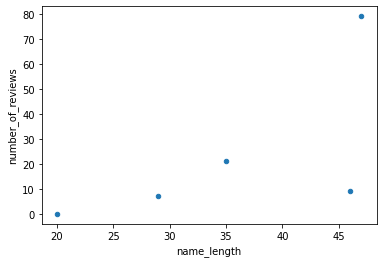

In [ ]:
data.plot.scatter(x="name_length", y ="number_of_reviews" )

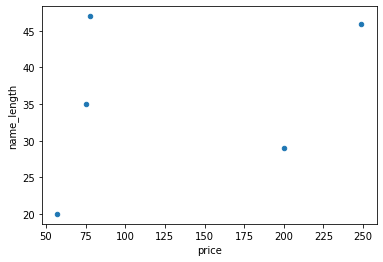

In [ ]:
data[data["name_length"]<50].plot.scatter(x="price", y ="name_length")

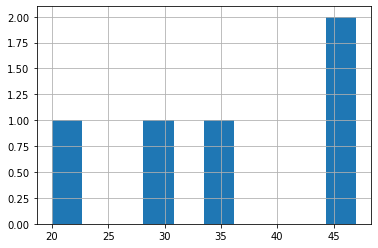

In [ ]:
data.name_length.hist()

In [ ]:
data['room_type'].value_counts()

Entire home/apt    5
Name: room_type, dtype: int64

In [ ]:
rt_price = data.groupby("room_type")["price"].mean()

In [ ]:
rt_price

room_type
Entire home/apt    131.8
Name: price, dtype: float64

In [ ]:
data["minimum_nights"].describe

<bound method NDFrame.describe of 16035    3
30489    1
31912    2
33261    3
34161    4
Name: minimum_nights, dtype: int64>

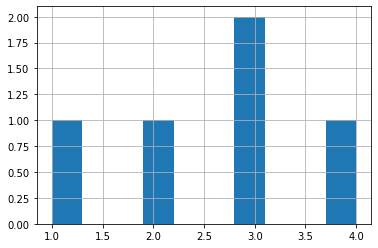

In [ ]:
hist_mn=data["minimum_nights"].hist()
hist_mn

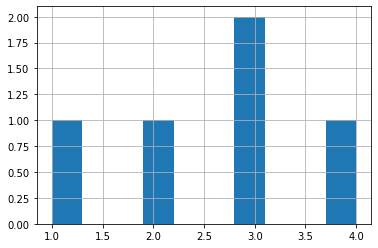

In [ ]:
hist_mn1=data["minimum_nights"][data["minimum_nights"]<10].hist()
hist_mn1

In [ ]:
data["minimum_nights"][data["minimum_nights"]>30]

Series([], Name: minimum_nights, dtype: int64)

In [ ]:
data.loc[(data.minimum_nights >30),"minimum_nights"]=30

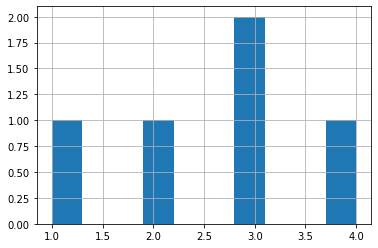

In [ ]:
hist_mn2=data["minimum_nights"][data["minimum_nights"]<30].hist()
hist_mn2

In [ ]:
data["minimum_nights"].corr(data["price"])

0.5019657965291167

In [ ]:
data["availability_365"].describe()

count      5.000000
mean     150.800000
std      161.952771
min        0.000000
25%       44.000000
50%       59.000000
75%      300.000000
max      351.000000
Name: availability_365, dtype: float64

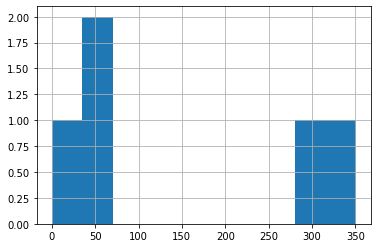

In [ ]:
hist_av=data["availability_365"].hist()
hist_av

In [ ]:
corr = data.corr(method='pearson')
plt.figure(figsize=(15,8))
data.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'name_length'],
      dtype='object')

<Figure size 1080x576 with 0 Axes>

In [ ]:
data.dtypes

host_id                             int64
neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
name_length                         int64
dtype: object

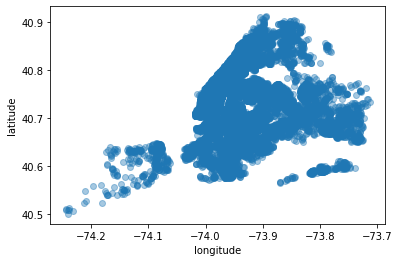

In [ ]:
data_price_95 = visual_data[visual_data['price'] <= visual_data.quantile(0.95)['price']]
plt.scatter(data_price_95['longitude'], data_price_95['latitude'], cmap=plt.get_cmap('jet'), alpha=0.4)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [ ]:
data_onehot1 = pd.get_dummies(data, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"],drop_first=True)
data_onehot1.drop(["neighbourhood"], axis=1, inplace=True)

In [ ]:
data_onehot1.shape

(5, 9)

In [ ]:
data_onehot2 = pd.get_dummies(data, columns=['neighbourhood_group',"neighbourhood","room_type"], prefix = ['ng',"nh","rt"],drop_first=True)

In [ ]:
data_onehot2.shape

(5, 13)

In [ ]:
XL1= data_onehot2.loc[:, data_onehot2.columns != 'price']
YL1 = data_onehot2["price"]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
rm_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:


print(rm_grid)



{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 30, 50, 70, 90, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
import time



In [ ]:
t1 = time.time() 
t2 =time.time()
(t2-t1)/60

3.2981236775716145e-07